In [1]:
import numpy as np

In [2]:
q = 1

In [3]:
g, k = 9.81, 0.5

In [4]:
y0, v0 = 10, 100
z0 = np.array([y0, v0])

In [5]:
def caidaLibre(z, t, g, k): 
    derivs = np.array([z[1],  -k*z[1] -g ])
    return derivs

In [6]:
#tiempo de vuelo
tv = (v0+np.sqrt(v0**2+2*g*y0))/g

In [7]:
tInc = 1/q
tStop = (1.+ tInc)*tv
t = np.arange(0., tStop, tInc)

In [8]:
def Euler(f_user, U0, t, *params):

    n = t.size
    
    neq = U0.size
    u = np.zeros((n, neq))
    
    u[0] = U0
    dt = (t[1]-t[0])/q
        
    for k in range(n-1):
        u[k+1] = u[k] + dt*f_user(u[k], t[k],*params)
        
    return u

In [9]:
def Heun(f_user, U0, t, *params):

    n  = t.size
    neq = U0.size
    u = np.zeros((n, neq))

    u[0] = U0
    h = (t[1]-t[0])/q
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*params)
        k2 = f_user(u[i]+k1*h, t[i+1],*params)
        u[i+1] = u[i] + h* (k1+k2)/2.
    return u


In [10]:
def Runge_kutta_4to(f_user, U0, t, *params):

    n = t.size
    neq = U0.size
    u = np.zeros((n, neq))

    u[0] = U0
    h = (t[1]-t[0])/q

    for i in range(n-1):
        k1 = f_user(u[i], t[i],*params)
        k2 = f_user(u[i]+(1/2)*k1*h, t[i]+(1/2)*h, *params)
        k3 = f_user(u[i]+(1/2)*k2*h, t[i]+(1/2)*h, *params)
        k4 = f_user(u[i]+k3*h, t[i]+h, *params)
        u[i+1] = u[i] + h*(k1+2*k2+2*k3+k4)/6.
    return u

In [11]:
psolnRK4 = Runge_kutta_4to(caidaLibre,z0,t,g,k)
psolnH = Heun(caidaLibre,z0,t,g,k)
psolnE = Euler(caidaLibre,z0,t,g,k)

In [12]:
import matplotlib.pyplot as plt

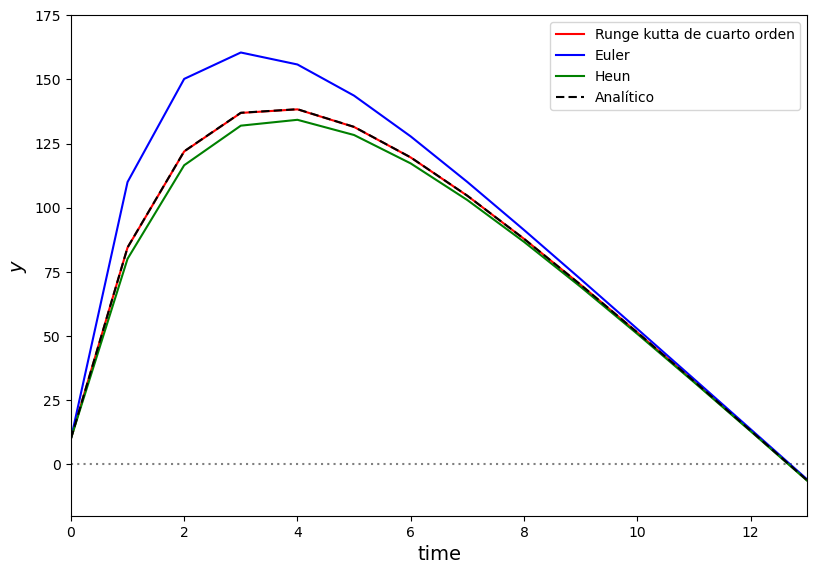

In [13]:
plt.figure(figsize=(9.5,6.5))
plt.plot(t,psolnRK4[:,0],color = 'red',label = 'Runge kutta de cuarto orden')
plt.plot(t,psolnE[:,0],color = 'blue',label = 'Euler')
plt.plot(t,psolnH[:,0],color = 'green',label = 'Heun')
y = y0 - (g/k)*t +(g+k*v0)*(1-np.exp(-k*t))/k**2.
plt.plot(t, y, dashes=(4, 2), color='black',label = "Analítico")
plt.xlabel('time', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.xlim(0.,13)
plt.ylim(-20,175)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'best')
plt.show()

Las gráficas de Heun y Runge Kutta cuarto orden son más similares entre sí que la de Euler. La que mejor se pega a la analítica es Runge Kutta debido a que es de orden mayor.

El método de euler es el que más se desvia sobre todo cuando la velocidad es más pequeña. En el inicio y el fin del movimiento todos los métodos convergen con el analítico.